In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv('./data/COVID19MEXICO2020.csv')

/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_7363/3042633106.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('./data/COVID19MEXICO2020.csv')


In [3]:
full_data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,...,2,1,1,2,97,3,99,México,97,97
1,2021-10-31,z2a3cf,1,6,24,2,24,24,28,1,...,1,2,97,2,97,6,99,México,97,97
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,...,2,1,2,2,97,7,99,México,97,97
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,...,2,1,1,2,97,3,99,México,97,97
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,...,2,1,2,2,97,7,99,México,97,97


In [20]:
full_data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [4]:
full_data.shape

(3868396, 40)

In [6]:
## Renaming to english
columns_to_keep = [
    'ENTIDAD_UM',
    'FECHA_ACTUALIZACION',
    'ID_REGISTRO',
    'SEXO',
    'TIPO_PACIENTE',
    'FECHA_INGRESO',
    'FECHA_SINTOMAS',
    'FECHA_DEF',
    'INTUBADO',
    'NEUMONIA',
    'EDAD',
    'EMBARAZO',
    'DIABETES',
    'EPOC',
    'ASMA',
    'INMUSUPR',
    'HIPERTENSION',
    'OTRA_COM',
    'CARDIOVASCULAR',
    'OBESIDAD',
    'RENAL_CRONICA',
    'TABAQUISMO',
    'CLASIFICACION_FINAL',
    'UCI'
    ]

full_data = full_data[columns_to_keep]

column_translation = {
    'FECHA_ACTUALIZACION': 'UPDATE_DATE',
    'ID_REGISTRO': 'RECORD_ID',
    'ORIGEN': 'SOURCE',
    'SECTOR': 'HEALTH_SECTOR',
    'ENTIDAD_UM': 'MEDICAL_UNIT_STATE',
    'SEXO': 'SEX',
    'ENTIDAD_NAC': 'BIRTH_STATE',
    'ENTIDAD_RES': 'RESIDENCE_STATE',
    'MUNICIPIO_RES': 'RESIDENCE_MUNICIPALITY',
    'TIPO_PACIENTE': 'PATIENT_TYPE',
    'FECHA_INGRESO': 'ADMISSION_DATE',
    'FECHA_SINTOMAS': 'SYMPTOM_ONSET_DATE',
    'FECHA_DEF': 'DEATH_DATE',
    'INTUBADO': 'INTUBATED',
    'NEUMONIA': 'PNEUMONIA',
    'EDAD': 'AGE',
    'NACIONALIDAD': 'NATIONALITY',
    'EMBARAZO': 'PREGNANCY',
    'HABLA_LENGUA_INDIG': 'SPEAKS_INDIGENOUS_LANGUAGE',
    'INDIGENA': 'INDIGENOUS',
    'DIABETES': 'DIABETES',
    'EPOC': 'COPD',
    'ASMA': 'ASTHMA',
    'INMUSUPR': 'IMMUNOSUPPRESSED',
    'HIPERTENSION': 'HYPERTENSION',
    'OTRA_COM': 'OTHER_COMORBIDITY',
    'CARDIOVASCULAR': 'CARDIOVASCULAR_DISEASE',
    'OBESIDAD': 'OBESITY',
    'RENAL_CRONICA': 'CHRONIC_KIDNEY_DISEASE',
    'TABAQUISMO': 'SMOKING',
    'OTRO_CASO': 'OTHER_CASE_CONTACT',
    'TOMA_MUESTRA_LAB': 'LAB_SAMPLE_TAKEN',
    'RESULTADO_LAB': 'LAB_RESULT',
    'TOMA_MUESTRA_ANTIGENO': 'ANTIGEN_SAMPLE_TAKEN',
    'RESULTADO_ANTIGENO': 'ANTIGEN_RESULT',
    'CLASIFICACION_FINAL': 'FINAL_CLASSIFICATION',
    'MIGRANTE': 'MIGRANT',
    'PAIS_NACIONALIDAD': 'NATIONALITY_COUNTRY',
    'PAIS_ORIGEN': 'ORIGIN_COUNTRY',
    'UCI': 'ICU'
}

full_data.rename(columns=column_translation, inplace=True)

/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_7363/3459232942.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data.rename(columns=column_translation, inplace=True)


In [ ]:
covid_data = full_data[full_data["FINAL_CLASSIFICATION"] == 3] ## keeping only covid cases

In [24]:
covid_data.shape

(1479749, 24)

In [ ]:
## only focusing on 1s and 2s
for column in covid_data.columns:
    nons = covid_data[(covid_data[column] != 1) & (covid_data[column] != 2)]
    print(f"Column: {column} has {nons.shape[0]} NANS")

Column: MEDICAL_UNIT_STATE has 1425503 NANS
Column: UPDATE_DATE has 1479749 NANS
Column: RECORD_ID has 1479749 NANS
Column: SEX has 0 NANS
Column: PATIENT_TYPE has 0 NANS
Column: ADMISSION_DATE has 1479749 NANS
Column: SYMPTOM_ONSET_DATE has 1479749 NANS
Column: DEATH_DATE has 1479749 NANS
Column: INTUBATED has 1181319 NANS
Column: PNEUMONIA has 3 NANS
Column: AGE has 1476996 NANS
Column: PREGNANCY has 751945 NANS
Column: DIABETES has 4200 NANS
Column: COPD has 3794 NANS
Column: ASTHMA has 3738 NANS
Column: IMMUNOSUPPRESSED has 3893 NANS
Column: HYPERTENSION has 3924 NANS
Column: OTHER_COMORBIDITY has 6964 NANS
Column: CARDIOVASCULAR_DISEASE has 3837 NANS
Column: OBESITY has 3736 NANS
Column: CHRONIC_KIDNEY_DISEASE has 3778 NANS
Column: SMOKING has 3985 NANS
Column: FINAL_CLASSIFICATION has 1479749 NANS
Column: ICU has 1181327 NANS


We cant really work with Intubated, pregnancy, and ICU classified cases.


In [ ]:
## cases per state
covid_data["MEDICAL_UNIT_STATE"].value_counts()

MEDICAL_UNIT_STATE
9     398436
15     95726
11     87474
19     87462
14     56237
5      52920
21     52659
27     45466
30     43420
24     42965
26     42962
28     42468
8      37182
22     36330
2      36073
16     35416
20     29129
25     27196
31     26766
12     26346
10     26212
13     25000
32     21635
3      18388
1      18173
23     15815
17     10741
29     10639
18      7943
6       7932
4       7392
7       7246
Name: count, dtype: int64

In [ ]:
## cases for Nuevo Leon
covid_data[covid_data["MEDICAL_UNIT_STATE"] == 19].shape

(87462, 24)

In [11]:
## cases for jalisco
covid_data[covid_data["MEDICAL_UNIT_STATE"] == 14].shape

(56237, 24)

In [12]:
## cases for Mexico City
covid_data[covid_data["MEDICAL_UNIT_STATE"] == 9].shape

(398436, 24)

In [ ]:
## Filtering

covid_data = covid_data[covid_data["AGE"] != 99]
covid_data = covid_data[covid_data["PATIENT_TYPE"] != 99]

##setting it as 1s and 0s
covid_data["FEMALE"] = np.where(covid_data["SEX"] == 1, 1, 0)
covid_data["MALE"] = np.where(covid_data["SEX"] == 2, 1, 0)

covid_data["HOSPITALIZED"] = np.where(covid_data["PATIENT_TYPE"] == 2, 1, 0)
covid_data["AMBULATORY"] = np.where(covid_data["PATIENT_TYPE"] == 1, 1, 0)



In [14]:
covid_data.to_csv("./data/full_data.csv")

In [33]:
covid_data.shape

(1479639, 28)

Text(0, 0.5, 'Age distribution of total cases')

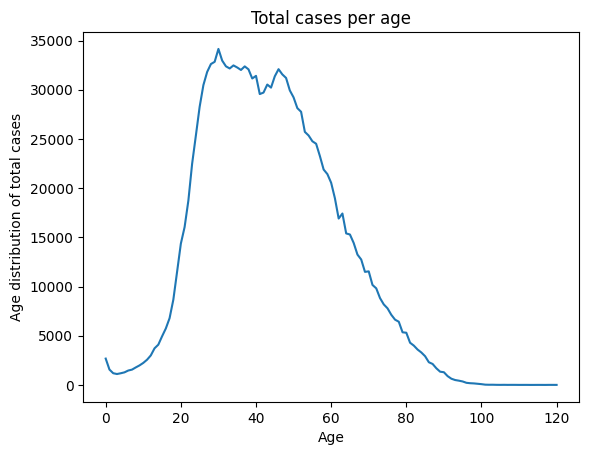

In [23]:
total_cases_per_age = covid_data.groupby("AGE")[["HOSPITALIZED", "AMBULATORY"]].sum()
total_cases_per_age["TOTAL_CASES"] = total_cases_per_age["HOSPITALIZED"] + total_cases_per_age["AMBULATORY"]

plt.plot(total_cases_per_age.index, total_cases_per_age["TOTAL_CASES"])
plt.title("Total cases per age")
plt.xlabel("Age")
plt.ylabel("Age distribution of total cases")


## Making the data work as in the paper


In [110]:
#data = pd.read_csv("./data/full_data.csv")
data = covid_data.copy()
data.head()

,MEDICAL_UNIT_STATE,UPDATE_DATE,RECORD_ID,SEX,PATIENT_TYPE,ADMISSION_DATE,SYMPTOM_ONSET_DATE,DEATH_DATE,INTUBATED,PNEUMONIA,...,CARDIOVASCULAR_DISEASE,OBESITY,CHRONIC_KIDNEY_DISEASE,SMOKING,FINAL_CLASSIFICATION,ICU,FEMALE,MALE,HOSPITALIZED,AMBULATORY
0,24,2021-10-31,z4d6fe,1,1,2020-12-06,2020-11-30,9999-99-99,97,2,...,2,2,2,2,3,97,1,0,0,1
3,8,2021-10-31,z3bf80,2,1,2020-07-28,2020-07-20,9999-99-99,97,2,...,2,2,2,2,3,97,0,1,0,1
15,31,2021-10-31,z54912,1,1,2020-06-12,2020-06-10,9999-99-99,97,2,...,2,2,2,2,3,97,1,0,0,1
18,1,2021-10-31,z552ac,1,1,2020-06-02,2020-05-30,9999-99-99,97,2,...,2,2,2,2,3,97,1,0,0,1
20,31,2021-10-31,z59345,2,1,2020-07-01,2020-06-30,9999-99-99,97,2,...,2,2,2,2,3,97,0,1,0,1


In [ ]:
# Stratifying by age
age_bins = [0, 15, 60, 80, 100]
age_labels = ["0-14", "15-59", "60-79", "80+"]
data["AGE_GROUP"] = pd.cut(data["AGE"], bins=age_bins, labels=age_labels, right=False)

data["SYMPTOM_ONSET_DATE"] = pd.to_datetime(data["SYMPTOM_ONSET_DATE"], errors="coerce")
data["ADMISSION_DATE"] = pd.to_datetime(data["ADMISSION_DATE"], errors="coerce")

data["SYMPTOM_ONSET_DATE"].fillna(pd.Timestamp("1970-01-01"), inplace=True)
data["ADMISSION_DATE"].fillna(pd.Timestamp("1970-01-01"), inplace=True)

data["AGE_GROUP"].value_counts()


AGE_GROUP
15-59    1174196
60-79     238304
80+        35522
0-14       31396
Name: count, dtype: int64

In [ ]:
data["SYMPTOM_ONSET_DATE"] = pd.to_datetime(data["SYMPTOM_ONSET_DATE"], format="%Y-%m-%d", errors="coerce")
data["ADMISSION_DATE"] = pd.to_datetime(data["ADMISSION_DATE"], format="%Y-%m-%d", errors="coerce")

result = data.groupby(["AGE_GROUP", "SYMPTOM_ONSET_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="onset")
result = result.rename(columns={"SYMPTOM_ONSET_DATE": "date"})

reported = data.groupby(["AGE_GROUP", "ADMISSION_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="reported")
reported = reported.rename(columns={"ADMISSION_DATE": "date"})

final_df = pd.merge(result, reported, on=["AGE_GROUP", "date", "MEDICAL_UNIT_STATE"], how="outer")

final_df



/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_7363/869895443.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(["AGE_GROUP", "SYMPTOM_ONSET_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="onset")
/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_7363/869895443.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reported = data.groupby(["AGE_GROUP", "ADMISSION_DATE", "MEDICAL_UNIT_STATE"]).size().reset_index(name="reported")


,AGE_GROUP,date,MEDICAL_UNIT_STATE,onset,reported
0,0-14,2020-02-19,1,0.0,NaN
1,0-14,2020-02-19,2,0.0,NaN
2,0-14,2020-02-19,3,0.0,NaN
3,0-14,2020-02-19,4,0.0,NaN
4,0-14,2020-02-19,5,0.0,NaN
...,...,...,...,...,...
45819,80+,2021-09-06,28,NaN,0.0
45820,80+,2021-09-06,29,NaN,0.0
45821,80+,2021-09-06,30,NaN,0.0
45822,80+,2021-09-06,31,NaN,0.0


In [28]:
final_df.describe()

,date,MEDICAL_UNIT_STATE,onset,reported
count,45824,45824.000000,40192.000000,44800.000000
mean,2020-08-19 12:28:09.385474816,16.500000,36.808768,33.022723
min,2020-02-19 00:00:00,1.000000,0.000000,0.000000
25%,2020-05-21 00:00:00,8.750000,1.000000,0.000000
50%,2020-08-18 12:00:00,16.500000,4.000000,3.000000
75%,2020-11-16 00:00:00,24.250000,25.000000,19.000000
max,2021-09-06 00:00:00,32.000000,4150.000000,5120.000000
std,NaN,9.233193,134.864930,136.519848


In [29]:
final_df.rename(columns={"onset": "onsets", "AGE_GROUP": "age_group", "MEDICAL_UNIT_STATE": "state"}, inplace=True)

In [30]:
final_df.groupby(["state", "date"])

In [31]:
final_df["age_group"].value_counts()

age_group
0-14     11456
15-59    11456
60-79    11456
80+      11456
Name: count, dtype: int64

In [32]:
final_df

,age_group,date,state,onsets,reported
0,0-14,2020-02-19,1,0.0,NaN
1,0-14,2020-02-19,2,0.0,NaN
2,0-14,2020-02-19,3,0.0,NaN
3,0-14,2020-02-19,4,0.0,NaN
4,0-14,2020-02-19,5,0.0,NaN
...,...,...,...,...,...
45819,80+,2021-09-06,28,NaN,0.0
45820,80+,2021-09-06,29,NaN,0.0
45821,80+,2021-09-06,30,NaN,0.0
45822,80+,2021-09-06,31,NaN,0.0


In [33]:
#set missing values to 0
final_df["reported"] = final_df["reported"].fillna(0)
final_df["onsets"] = final_df["onsets"].fillna(0)

In [34]:
final_df.to_csv("./data/state_data.csv", index=False)

In [35]:
final_df = pd.read_csv("./data/state_data.csv")

## State Data

In [36]:
test = final_df[final_df["date"] < "2021-01-25"]

In [64]:
test.to_csv("./data/age_group_data.csv", index=False)

In [117]:
test[test["state"] == 19].to_csv("./data/age_group_data_mty.csv", index=False)
test[test["state"] == 14].to_csv("./data/age_group_data_jal.csv", index=False)
test[test["state"] == 9].to_csv("./data/age_group_data_mx.csv", index=False)

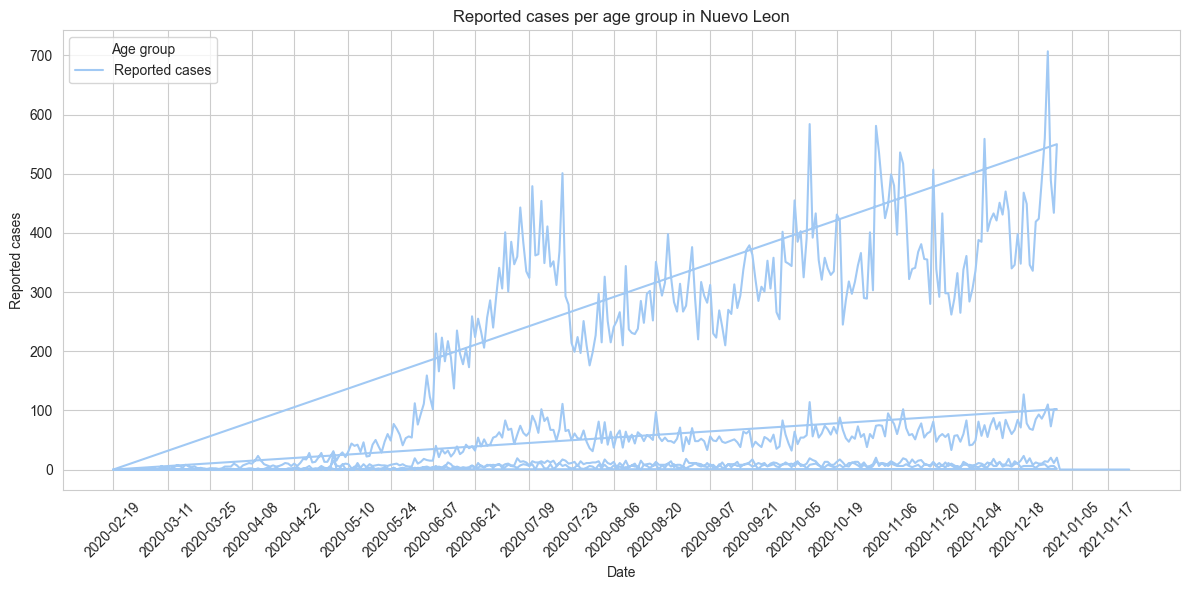

In [45]:
casos_mty = test[test["state"] == 19]
plt.figure(figsize=(12, 6))
plt.plot(casos_mty["date"], casos_mty['onsets'], label="Reported cases")
plt.title("Reported cases per age group in Nuevo Leon")
plt.xlabel("Date")
plt.ylabel("Reported cases")
#plt.xticks(rotation=45)
plt.xticks(casos_mty["date"][::60], rotation=45)
plt.legend(title="Age group")
plt.tight_layout()

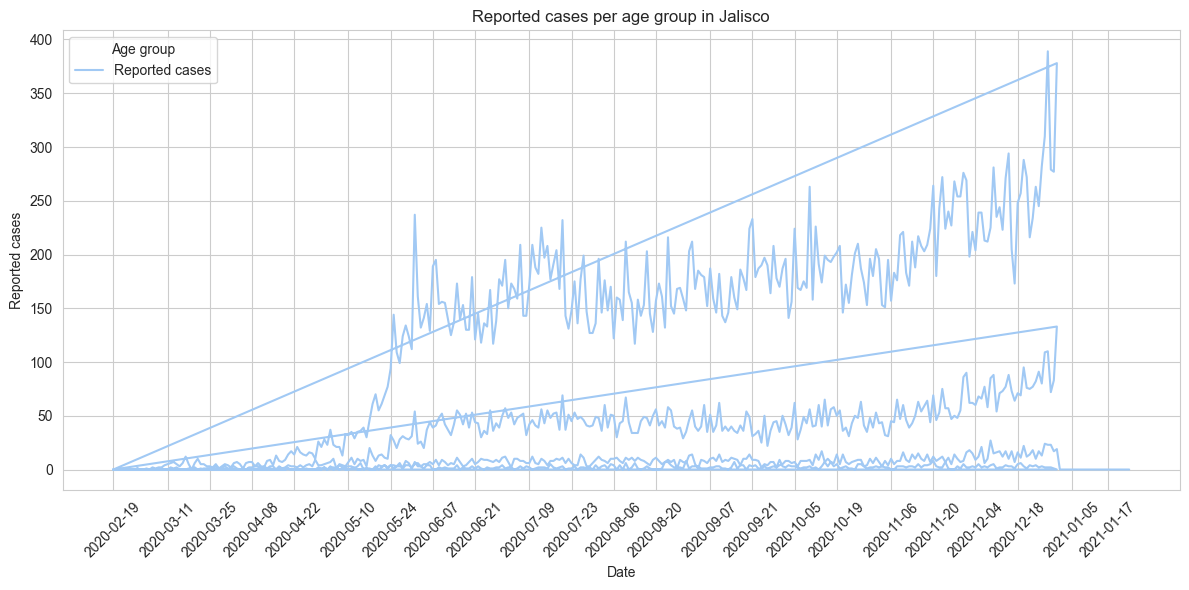

In [46]:
casos_jal = test[test["state"] == 14]
plt.figure(figsize=(12, 6))
plt.plot(casos_mty["date"], casos_jal['onsets'], label="Reported cases")
plt.title("Reported cases per age group in Jalisco")
plt.xlabel("Date")
plt.ylabel("Reported cases")
#plt.xticks(rotation=45)
plt.xticks(casos_jal["date"][::60], rotation=45)
plt.legend(title="Age group")
plt.tight_layout()

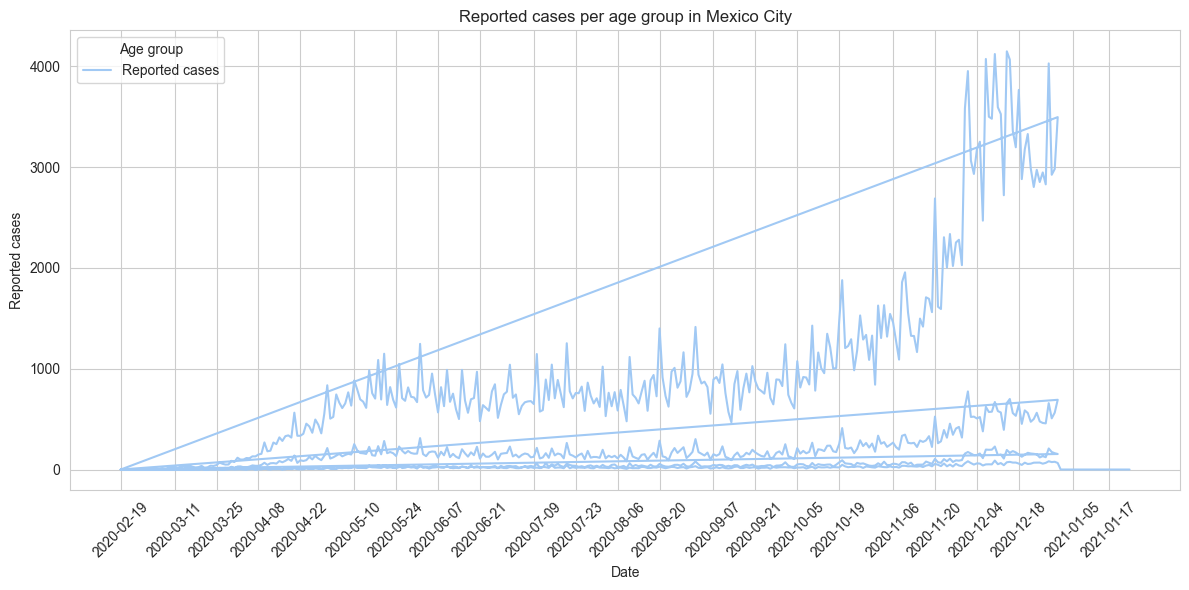

In [47]:
casos_cdmx = test[test["state"] == 9]
plt.figure(figsize=(12, 6))
plt.plot(casos_mty["date"], casos_cdmx['onsets'], label="Reported cases")
plt.title("Reported cases per age group in Mexico City")
plt.xlabel("Date")
plt.ylabel("Reported cases")
#plt.xticks(rotation=45)
plt.xticks(casos_cdmx["date"][::60], rotation=45)
plt.legend(title="Age group")
plt.tight_layout()

## generating the age distribution file



In [52]:
final_df = pd.read_csv("./data/state_data.csv")
final_df.head()

,age_group,date,state,onsets,reported
0,0-14,2020-02-19,1,0.0,0.0
1,0-14,2020-02-19,2,0.0,0.0
2,0-14,2020-02-19,3,0.0,0.0
3,0-14,2020-02-19,4,0.0,0.0
4,0-14,2020-02-19,5,0.0,0.0


In [76]:
## getting the total cases per age group
agegroup = final_df.groupby(["date", "age_group"]).sum().reset_index().drop(columns=["state"])
agegroup = agegroup[(agegroup["date"] < "2020-12-25") & (agegroup["date"] > "2020-03-15")]

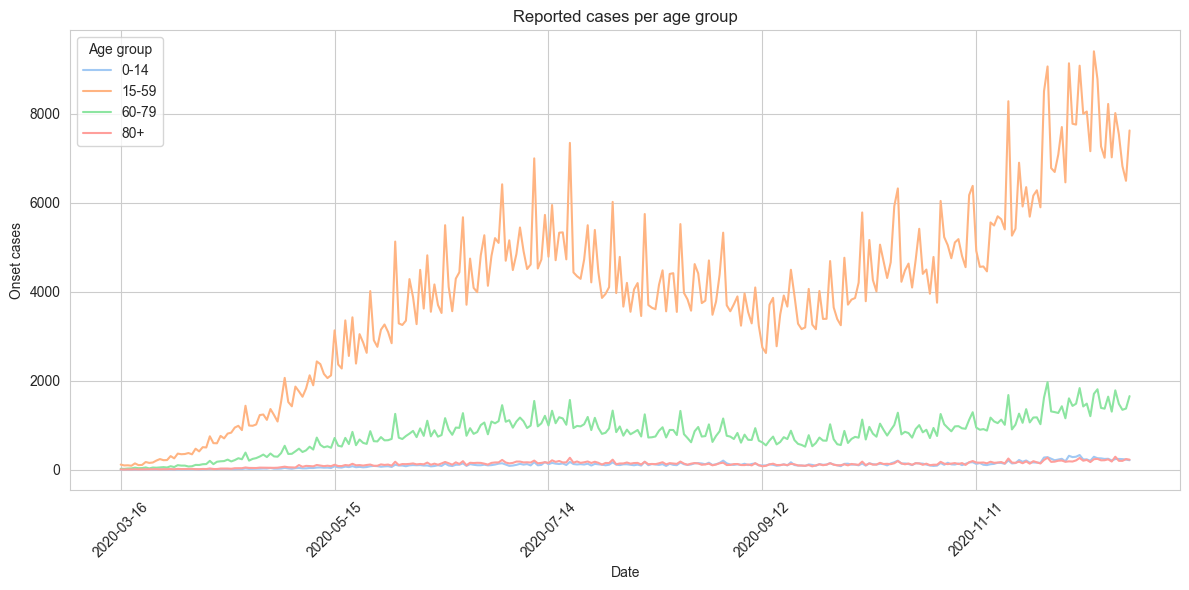

In [77]:
plt.figure(figsize=(12, 6))
for age in age_labels:
    group = agegroup[agegroup["age_group"] == age]
    plt.plot(group["date"], group["onsets"], label=age)
plt.legend(title="Age group")
plt.title("Reported cases per age group")
plt.xlabel("Date")
plt.ylabel("Onset cases")
#plt.xticks(rotation=45)
plt.xticks(group["date"][::60], rotation=45)
plt.tight_layout()


In [78]:
agegroup["age_group"].unique()

array(['0-14', '15-59', '60-79', '80+'], dtype=object)

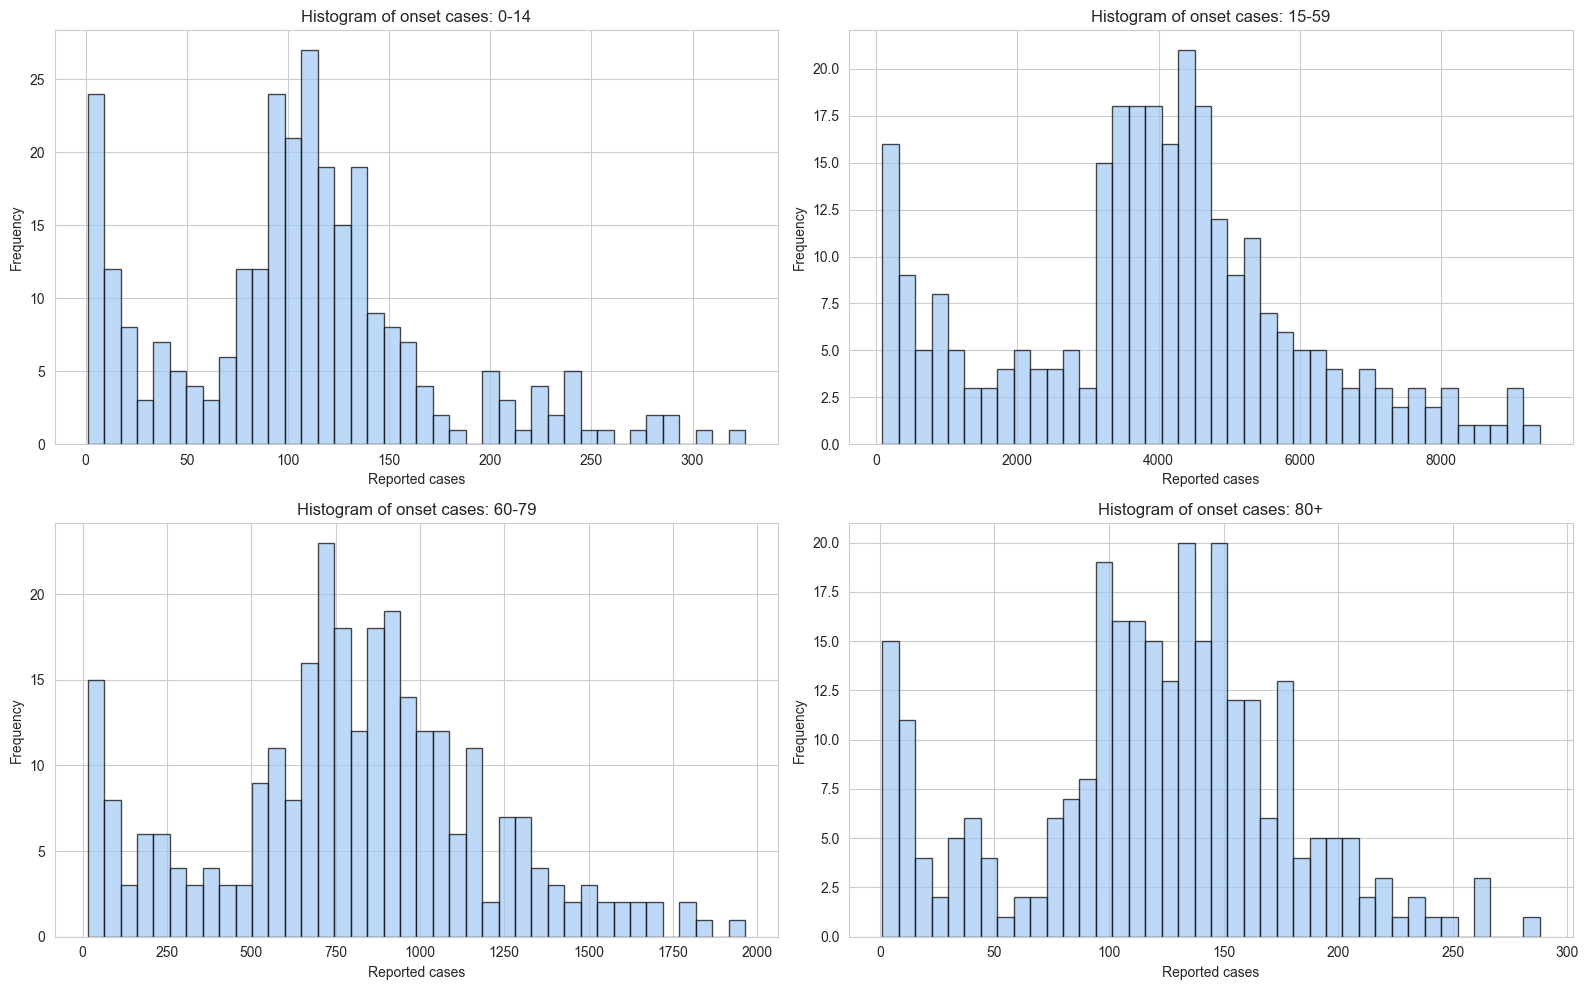

In [ ]:
## histogram showcasing the frequency of counts of cases per age group
plt.figure(figsize=(16, 10))
for i, age in enumerate(age_labels):
    plt.subplot(2, 2, i + 1)
    group = agegroup[agegroup["age_group"] == age]
    plt.hist(group["onsets"], bins=40, alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of onset cases: {age}")
    plt.xlabel("Reported cases")
    plt.ylabel("Frequency")
plt.tight_layout()

Text(0, 0.5, 'Frequency')

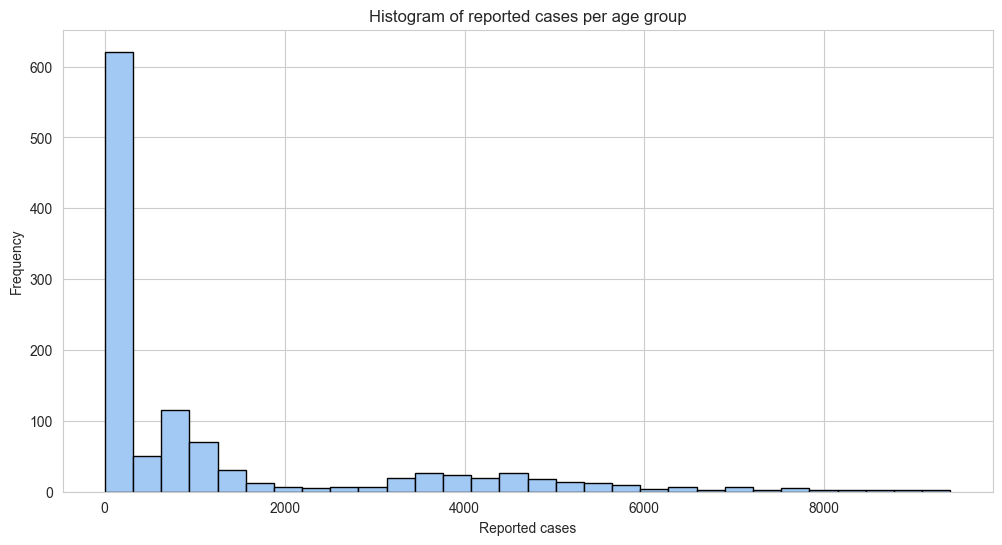

In [81]:
## Drop onset zeros
agegroup = agegroup[agegroup["onsets"] != 0]
plt.figure(figsize=(12, 6))
plt.hist(agegroup["onsets"], bins=30, edgecolor='black')
plt.title("Histogram of reported cases per age group")
plt.xlabel("Reported cases")
plt.ylabel("Frequency")


In [72]:
agegroup.to_csv("./data/age_group_data.csv", index=False)

In [103]:
result.columns

Index(['AGE_GROUP', 'date', 'MEDICAL_UNIT_STATE', 'onset'], dtype='object')

In [106]:
data

,age_group,date,onsets,reported
0,0-14,2020-02-19,0.0,0.0
1,0-14,2020-02-22,0.0,0.0
2,0-14,2020-02-23,0.0,0.0
3,0-14,2020-02-25,0.0,0.0
4,0-14,2020-02-26,0.0,0.0
...,...,...,...,...
1347,80+,2021-01-20,0.0,0.0
1348,80+,2021-01-21,0.0,3.0
1349,80+,2021-01-22,0.0,2.0
1350,80+,2021-01-23,0.0,0.0


In [109]:
data.columns

Index(['UPDATE_DATE', 'RECORD_ID', 'SEX', 'PATIENT_TYPE', 'ADMISSION_DATE',
       'SYMPTOM_ONSET_DATE', 'DEATH_DATE', 'INTUBATED', 'PNEUMONIA', 'AGE',
       'PREGNANCY', 'DIABETES', 'COPD', 'ASTHMA', 'IMMUNOSUPPRESSED',
       'HYPERTENSION', 'OTHER_COMORBIDITY', 'CARDIOVASCULAR_DISEASE',
       'OBESITY', 'CHRONIC_KIDNEY_DISEASE', 'SMOKING', 'FINAL_CLASSIFICATION',
       'ICU', 'FEMALE', 'MALE', 'HOSPITALIZED', 'AMBULATORY'],
      dtype='object')

In [111]:
age_bins = [0, 15, 60, 80, 100]
age_labels = ["0-14", "15-59", "60-79", "80+"]
data["AGE_GROUP"] = pd.cut(data["AGE"], bins=age_bins, labels=age_labels, right=False)

#getting a count of symptoms and cases reported per date per age group
data["SYMPTOM_ONSET_DATE"] = pd.to_datetime(data["SYMPTOM_ONSET_DATE"], format="%Y-%m-%d", errors="coerce")
data["ADMISSION_DATE"] = pd.to_datetime(data["ADMISSION_DATE"], format="%Y-%m-%d", errors="coerce")
data.drop(columns=["MEDICAL_UNIT_STATE"], inplace=True)
# Grouping by age group and date, and counting cases
result = data.groupby(["AGE_GROUP", "SYMPTOM_ONSET_DATE"]).size().reset_index(name="onset")
result = result.rename(columns={"SYMPTOM_ONSET_DATE": "date"})


/var/folders/_f/sc03zbpx4wnbdctrkv1pq2lh0000gn/T/ipykernel_7363/3926014430.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(["AGE_GROUP", "SYMPTOM_ONSET_DATE"]).size().reset_index(name="onset")


In [112]:
result

,AGE_GROUP,date,onset
0,0-14,2020-02-19,0
1,0-14,2020-02-22,0
2,0-14,2020-02-23,0
3,0-14,2020-02-25,0
4,0-14,2020-02-26,0
...,...,...,...
1251,80+,2020-12-27,264
1252,80+,2020-12-28,302
1253,80+,2020-12-29,250
1254,80+,2020-12-30,252


In [115]:
resul2t = data.groupby([ "SYMPTOM_ONSET_DATE"]).size().reset_index(name="onset")
resul2t = resul2t.rename(columns={"SYMPTOM_ONSET_DATE": "date"})

In [118]:
resul2t.to_csv("./data/last_try.csv", index=False)

Text(0.5, 1.0, 'Reported cases')

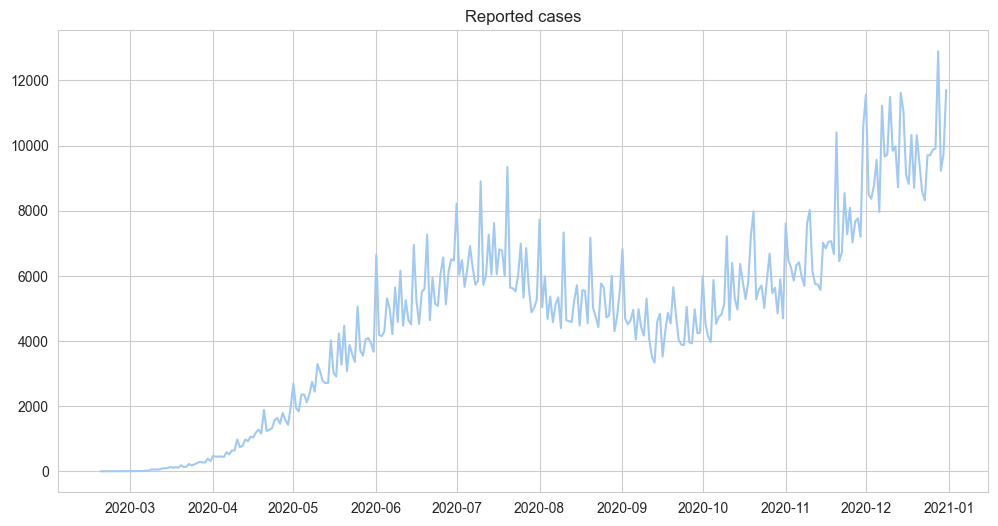

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(resul2t["date"], resul2t['onset'], label="Reported cases")
plt.title("Reported cases")